## 0. Importing external modules

In [1]:
## magics

%load_ext version_information 
%version_information numpy,xarray,netCDF4, matplotlib


Software versions
Python 2.7.15 64bit [GCC 7.2.0]
IPython 4.2.0
OS Linux 3.16.0 6 amd64 x86_64 with debian 8.11
numpy 1.11.2
xarray 0.10.4
netCDF4 1.4.0
matplotlib 2.2.2
Wed Aug 29 09:36:07 2018 CEST

In [2]:
## path for modules

import sys
import glob
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy.ma as ma

sys.path.insert(0,'/home/albert/lib/python/AJ-spectre/')
from natl60_10_by_10_boxes import boxes
import plot_box as pb

%matplotlib inline
%autosave 60

Autosaving every 60 seconds


## 1. Loading daily outputs of mixed layer depth and large scale horizontal gradient of buoyancy

In [3]:
database = '/media/extra/DATA/NATL60/NATL60-CJM165-S/box1/'
mldfiles = sorted(glob.glob(database + 'NATL60box1-CJM165_y2*_somxl010.nc'))
gradbfiles = sorted(glob.glob(database + 'NATL60box1-CJM165_y2*_hgradb_large_scale.nc'))
wbuoyfiles = sorted(glob.glob(database + 'NATL60box1-CJM165_y2*_mxlwbuoy_filt.nc'))

In [4]:
time_counter=xr.open_mfdataset(mldfiles)['time_counter']

In [5]:
mld=xr.open_mfdataset(mldfiles)['somxl010']
gradb=xr.open_mfdataset(gradbfiles)['vohgradb']
wbuoy=xr.open_mfdataset(wbuoyfiles)['somxlint']

In [6]:
mld.shape

(365, 758, 601)

In [7]:
gradb.shape

(365, 758, 601)

In [8]:
wbuoy.shape

(365, 758, 601)

In [9]:
mean_mld=np.nanmean(np.nanmean(mld,1),1)
mean_gradb=np.nanmean(np.nanmean(gradb,1),1)
mean_wbuoy=np.nanmean(np.nanmean(wbuoy,1),1)/mean_mld
mean_wb = (mean_mld**2)*mean_gradb

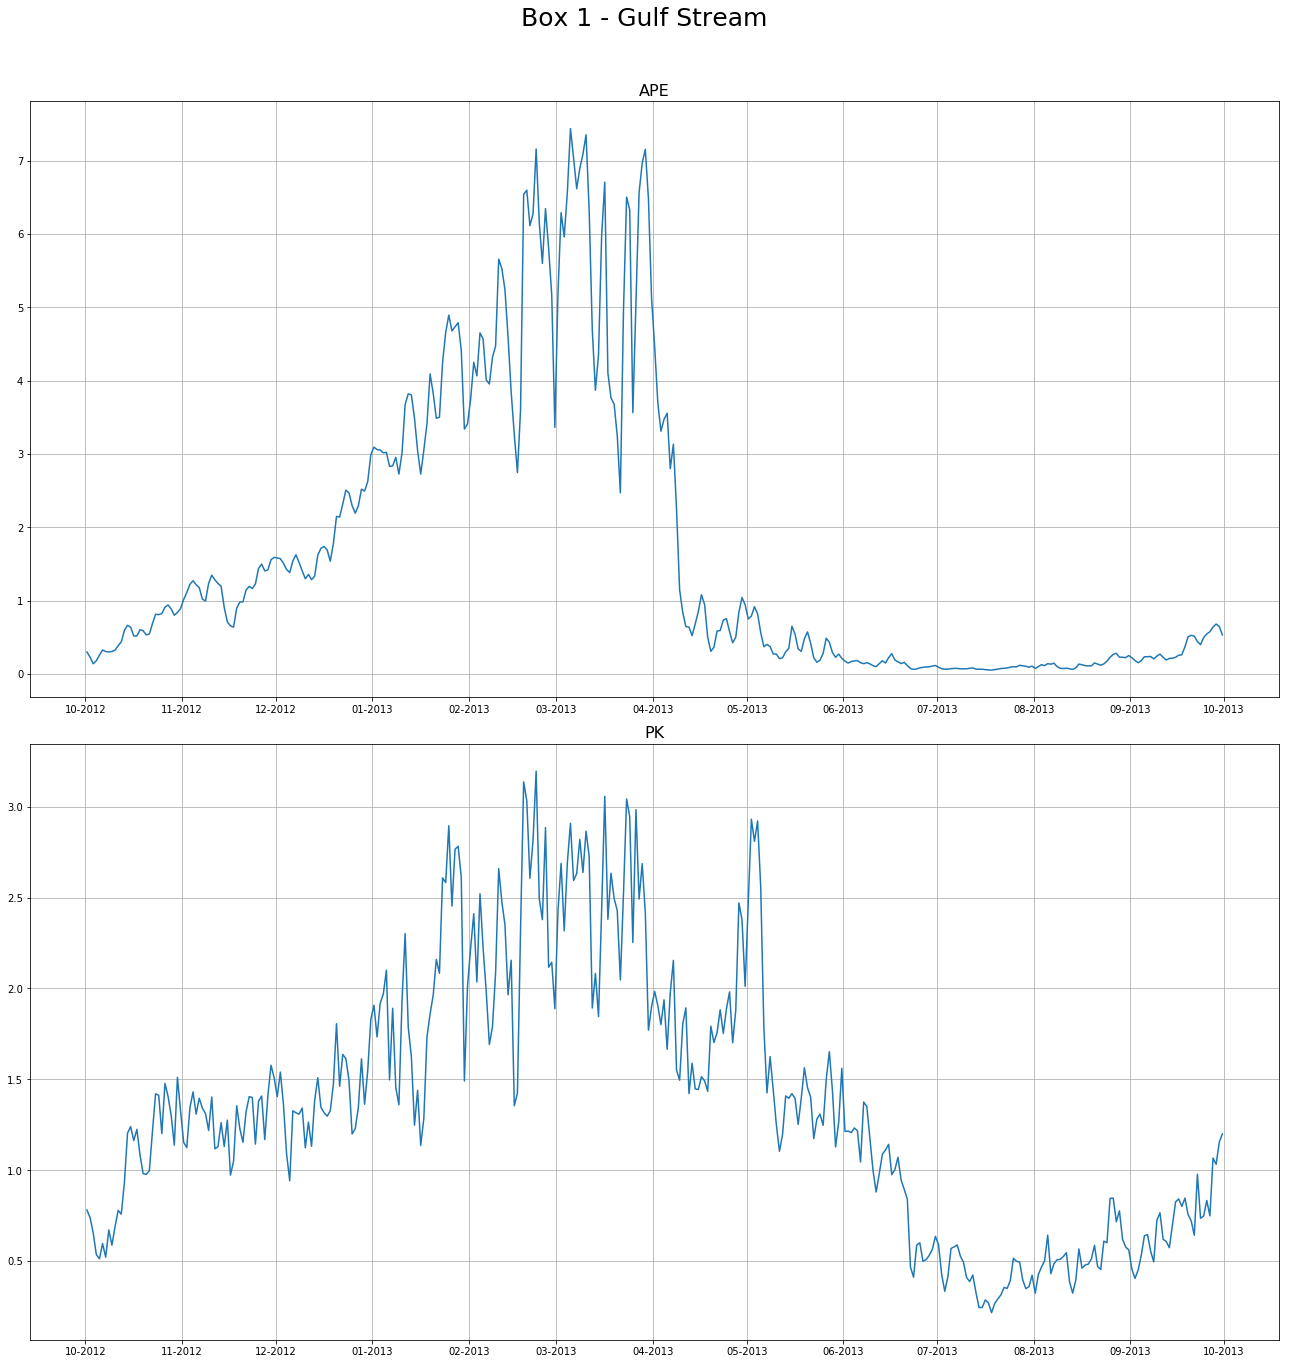

In [11]:
fig, axs = plt.subplots(2,1, figsize=(18, 18))
axs = axs.ravel()
#title = 'Time series of APE (in m2/s2) and PK (in m2/s3) in Box 1 - Gulf Stream'
title = 'Box 1 - Gulf Stream'
plt.suptitle(title,size = 25,y=1.05)

axs[0].plot(time_counter,1e4*mean_wb)
axs[0].set_title('APE',size=16)
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
axs[0].grid(True)
fig.tight_layout()

axs[1].plot(time_counter,1e8*mean_wbuoy)
axs[1].set_title('PK',size=16)
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
axs[1].grid(True)
fig.tight_layout()

plt.savefig("NATL60_box1-APE-PK.png")

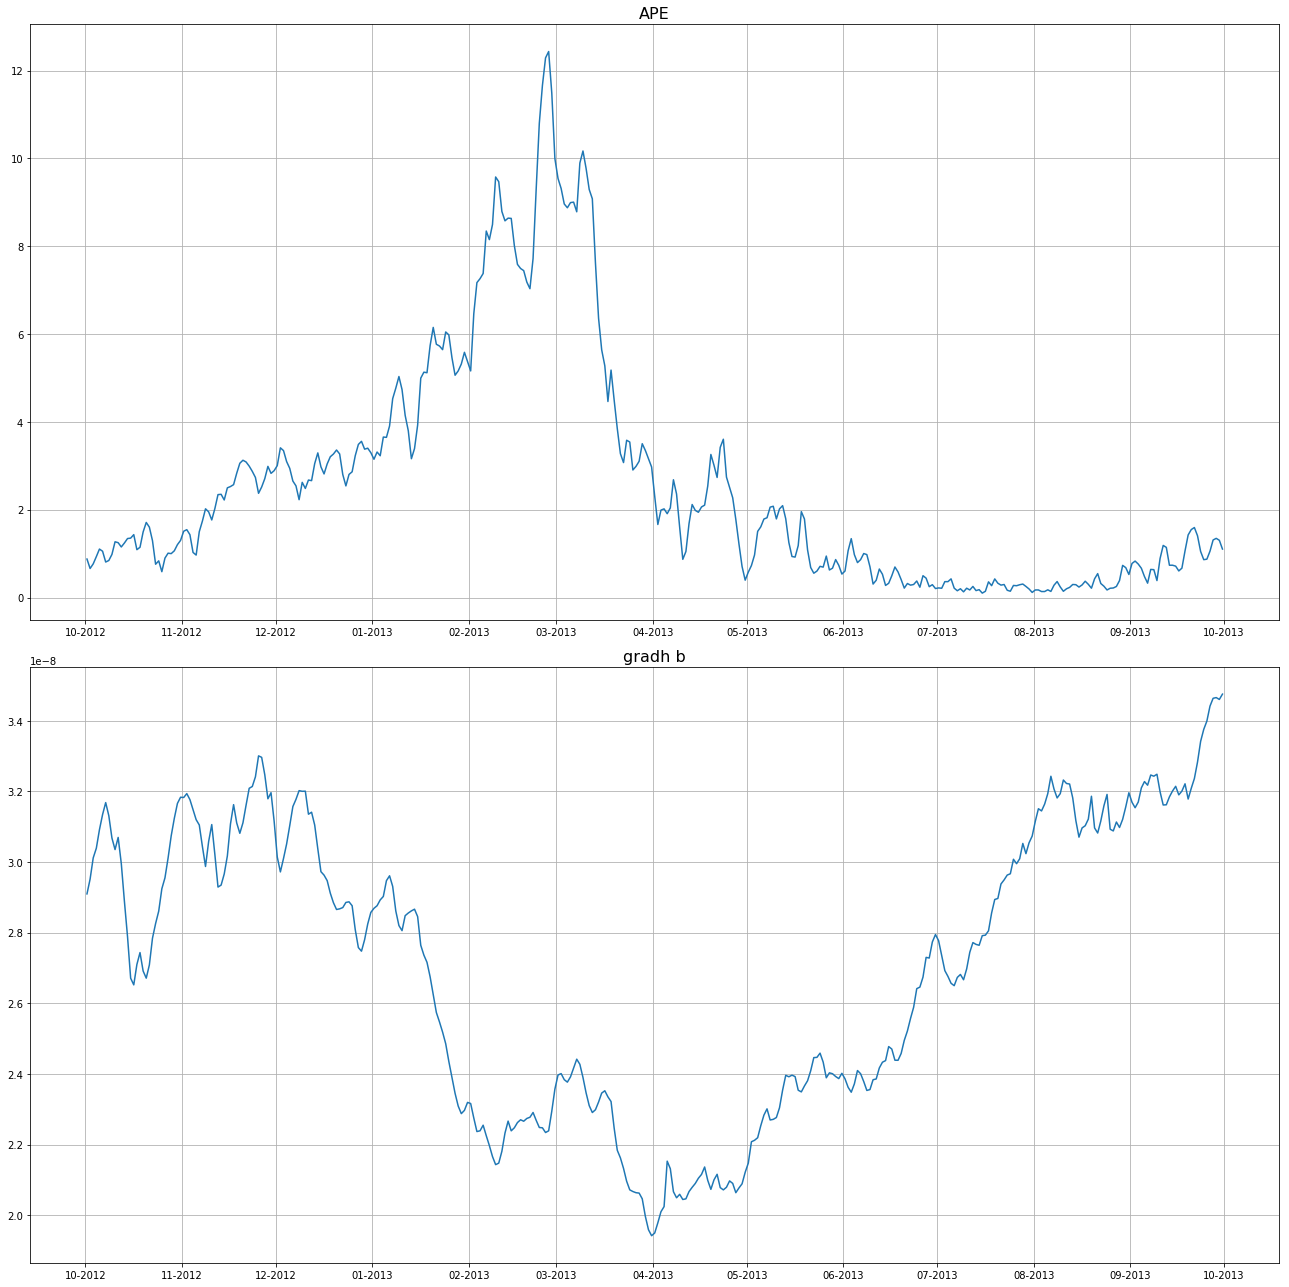

In [27]:
fig, axs = plt.subplots(2,1, figsize=(18, 18))
axs = axs.ravel()

axs[0].plot(time_counter,1e4*mean_wb)
axs[0].set_title('APE',size=16)
axs[0].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[0].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
axs[0].grid(True)
fig.tight_layout()

axs[1].plot(time_counter,mean_gradb)
axs[1].set_title('gradh b',size=16)
axs[1].xaxis.set_major_locator(mdates.MonthLocator(interval=1))
axs[1].xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))
axs[1].grid(True)
fig.tight_layout()

